In [1]:
from google.colab import drive
drive.mount ('/content/drive')


Mounted at /content/drive


In [2]:
!pip install pandas


In [3]:
!pip install pandas matplotlib seaborn scikit-learn


In [4]:
# Importamos dependencias
import pandas as pd
import numpy as np

In [5]:
# Cargar el dataset
url = url = "https://raw.githubusercontent.com/lagabyok/M1000-IA-FakeXpert/main/data/processed/combined_data.csv"
FakeXpert = pd.read_csv(url)

# Mostrar las primeras filas del dataset
FakeXpert.head()

,title,text,subject,date,label
0,Exclusive: U.S. budget plan includes over $13 ...,WASHINGTON (Reuters) - The Pentagonâ€™s next f...,politicsNews,2016-02-01,True
1,House Republicans to push Puerto Rico bill by ...,WASHINGTON (Reuters) - Republicans plan to bri...,politicsNews,2016-02-01,True
2,Minnesota Governor Dayton released from hospit...,(Reuters) - Minnesota Governor Mark Dayton was...,politicsNews,2016-02-01,True
3,Obama likely to discuss TPP Puerto Rico with R...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,2016-02-01,True
4,Obama to seek $755 million for cancer 'moonsho...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,2016-02-01,True


In [6]:
# Información general del dataset
FakeXpert.info()

# Resumen estadístico de las variables numéricas
FakeXpert.describe()

# Conteo de valores faltantes por columna
FakeXpert.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39573 entries, 0 to 39572
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    39573 non-null  object
 1   text     39573 non-null  object
 2   subject  39573 non-null  object
 3   date     39573 non-null  object
 4   label    39573 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 1.2+ MB


title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [7]:
# CREAR LINEA DE TIEMPO

#Leer el archivo CSV
file_path = 'https://raw.githubusercontent.com/lagabyok/M1000-IA-FakeXpert/main/data/processed/combined_data.csv'
data = pd.read_csv(file_path, parse_dates=['date'])  # columna de fecha


In [8]:
#Establecer la columna de fecha como índice
data.set_index('date', inplace=True)


In [9]:
#Resumen y análisis temporal
if data.index.name != 'date':
    data.set_index('date', inplace=True)

# Contar las entradas por mes y por categoría de noticia
monthly_counts = data.resample('M')['label'].value_counts().unstack()

print(monthly_counts)


label       False   True 
date                     
2015-03-31    7.0     NaN
2015-04-30  264.0     NaN
2015-05-31  273.0     NaN
2015-06-30  202.0     NaN
2015-07-31  259.0     NaN
2015-08-31  192.0     NaN
2015-09-30  187.0     NaN
2015-10-31  248.0     NaN
2015-11-30  227.0     NaN
2015-12-31  241.0     NaN
2016-01-31  900.0     NaN
2016-02-29  914.0   285.0
2016-03-31  943.0   380.0
2016-04-30  883.0   369.0
2016-05-31  899.0   378.0
2016-06-30  765.0   391.0
2016-07-31  802.0   322.0
2016-08-31  817.0   245.0
2016-09-30  804.0   329.0
2016-10-31  916.0   324.0
2016-11-30  814.0   606.0
2016-12-31  738.0   402.0
2017-01-31  857.0     NaN
2017-02-28  725.0   565.0
2017-03-31  876.0   649.0
2017-04-30  681.0   505.0
2017-05-31  740.0   484.0
2017-06-30  714.0   537.0
2017-07-31  703.0   522.0
2017-08-31  725.0   626.0
2017-09-30  567.0  2975.0
2017-10-31  534.0  3075.0
2017-11-30  471.0  2972.0
2017-12-31  375.0  2337.0
2018-02-28   32.0     NaN


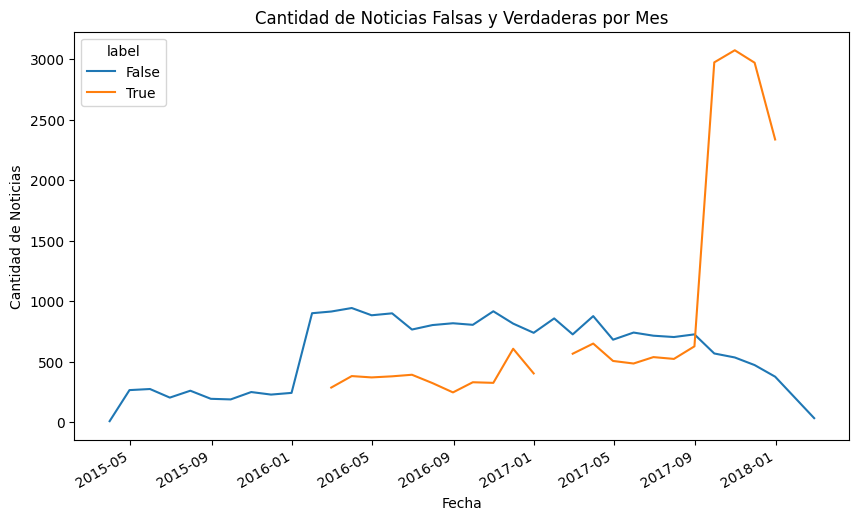

In [10]:
#Visualización

import matplotlib.pyplot as plt

# Graficar la cantidad de noticias falsas y verdaderas por mes
monthly_counts.plot(kind='line', figsize=(10, 6))
plt.title('Cantidad de Noticias Falsas y Verdaderas por Mes')
plt.ylabel('Cantidad de Noticias')
plt.xlabel('Fecha')
plt.show()


In [11]:

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from gensim import corpora, models

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


# Definir funciones para el procesamiento de texto
def extract_keywords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text.lower())
    filtered_words = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    return filtered_words

def calculate_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return lemmatized_tokens

# Tokenización y preprocesamiento de texto
FakeXpert['preprocessed_text'] = FakeXpert['text'].apply(preprocess_text)

# Creación del diccionario de términos
dictionary = corpora.Dictionary(FakeXpert['preprocessed_text'])

# Creación de la matriz término-documento
corpus = [dictionary.doc2bow(text) for text in FakeXpert['preprocessed_text']]

# Entrenamiento del modelo LDA
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Agregar columnas de palabras clave y sentimientos
FakeXpert['keywords'] = FakeXpert['text'].apply(lambda x: extract_keywords(x))
FakeXpert['sentiment'] = FakeXpert['text'].apply(lambda x: calculate_sentiment(x))

# Asignación de temas a los documentos
FakeXpert['topic'] = FakeXpert['preprocessed_text'].apply(lambda x: lda_model[dictionary.doc2bow(x)][0][0])

# Visualización de los resultados
print(FakeXpert[['text', 'keywords', 'sentiment', 'topic']])



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                    text  \
0      WASHINGTON (Reuters) - The Pentagonâ€™s next f...   
1      WASHINGTON (Reuters) - Republicans plan to bri...   
2      (Reuters) - Minnesota Governor Mark Dayton was...   
3      WASHINGTON (Reuters) - President Barack Obama ...   
4      WASHINGTON (Reuters) - President Barack Obama ...   
...                                                  ...   
39568  Just one more reminder of why President Trump ...   
39569  The GOP presidential candidate who couldn t se...   
39570  According to The Hill, Democrat Senator Bob Ca...   
39571  If we protect every other government building ...   
39572  Ami Horowitz is fantastic! Check out this man ...   

                                                keywords  sentiment  topic  
0      [washington, reuters, next, budget, proposal, ...   0.145933      2  
1      [washington, reuters, republicans, plan, bring...   0.071429      1  
2      [reuters, minnesota, governor, mark, dayt

**Coloreamos nuevas columnas para mejor visualizacion . **

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from gensim import corpora, models
import random

# Descargar recursos de NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Definir los códigos de formato de color ANSI
class colors:
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    ENDC = '\033[0m'

# Colorear las nuevas columnas 'topic', 'sentiment' y 'keywords' en todo el conjunto de datos
FakeXpert['colored_keywords'] = FakeXpert['keywords'].apply(lambda x: [colors.BLUE + keyword + colors.ENDC for keyword in x])
FakeXpert['colored_sentiment'] = FakeXpert['sentiment'].apply(lambda x: colors.GREEN + str(x) + colors.ENDC)
FakeXpert['colored_topic'] = FakeXpert['topic'].apply(lambda x: colors.YELLOW + str(x) + colors.ENDC)

# Función para categorizar el sentimiento
def categorize_sentiment(sentiment_score):
    if sentiment_score > 0.2:
        return "Positive"
    elif sentiment_score < -0.2:
        return "Negative"
    else:
        return "Neutral"

# Seleccionar aleatoriamente 3 ejemplos para imprimir
sample_indices = random.sample(range(len(FakeXpert)), 3)
sample_test_data = FakeXpert.iloc[sample_indices]

# Imprimir los ejemplos seleccionados con las nuevas columnas coloreadas y el sentimiento categorizado
for _, row in sample_test_data.iterrows():
    colored_keywords = ' '.join(row['colored_keywords'])
    colored_text = row['text']
    colored_text += '\nKeywords: ' + colored_keywords
    colored_text += '\nSentiment: ' + colors.GREEN + categorize_sentiment(row['sentiment']) + colors.ENDC
    colored_text += '\nTopic: ' + row['colored_topic']
    print(colored_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


WASHINGTON (Reuters) - U.S. Attorney General Jeff Sessions said in a letter on Saturday that he will appear before the Senate Intelligence Committee on Tuesday to address matters former FBI Director James Comey brought up this week in testimony to the same panel. In a letter seen by Reuters, Sessions told Senator Richard Shelby, chairman of the Senate Appropriations Subcommittee on Commerce, Justice, Science and Related Agencies, that the intelligence committee is the â€œmost appropriateâ€ place to address matters that came up during Comeyâ€™s hearing on Thursday. The letter did not say whether Sessions planned to give public testimony or to appear before the panel behind closed doors. â€œIn light of reports regarding Mr. Comeyâ€™s recent testimony before the Senate Select Committee on Intelligence, it is important that I have an opportunity to address these matters in the appropriate forum,â€ Sessions said in the letter. The committee â€œis the most appropriate forum for such matter

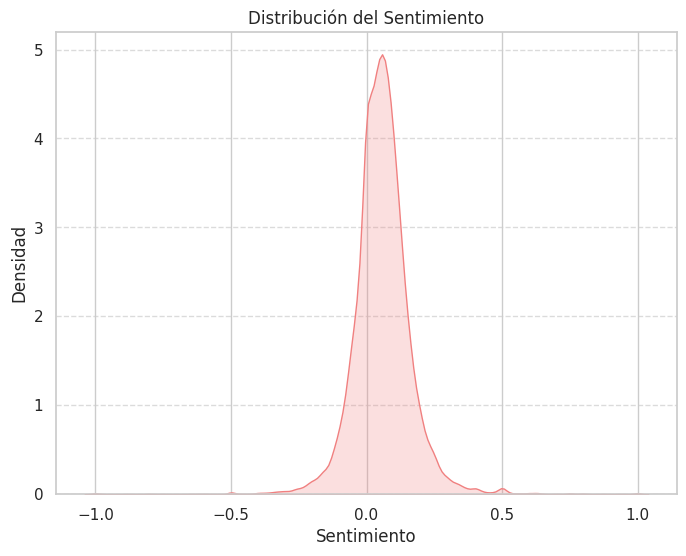

In [16]:
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Gráfico de densidad para la distribución del sentimiento
plt.figure(figsize=(8, 6))
sns.kdeplot(FakeXpert['sentiment'], color='lightcoral', fill=True)
plt.title('Distribución del Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Densidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




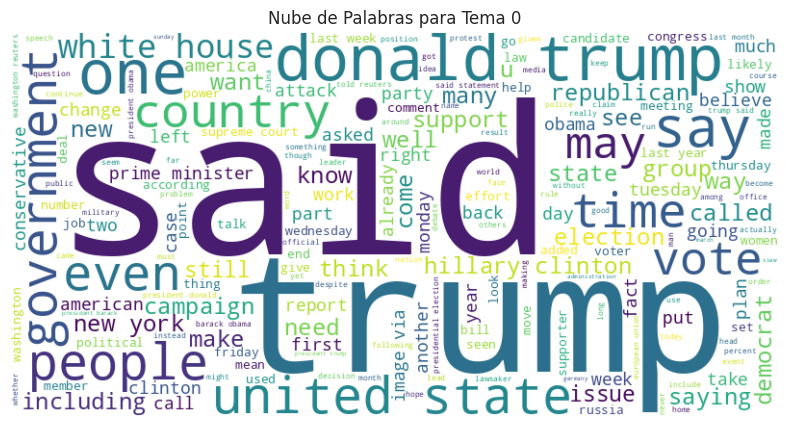

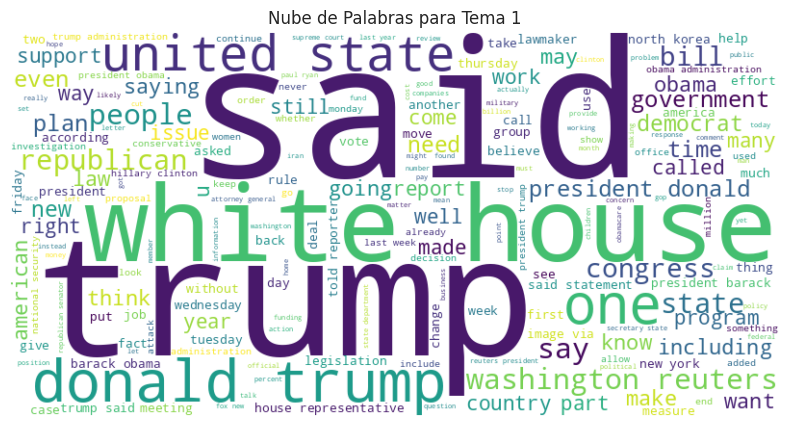

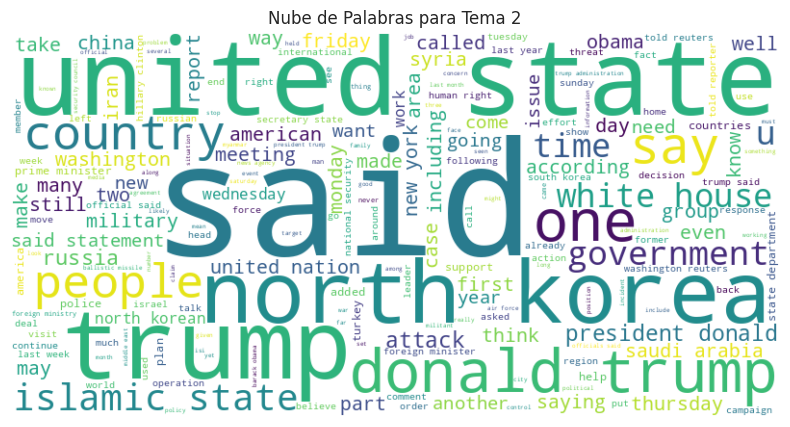

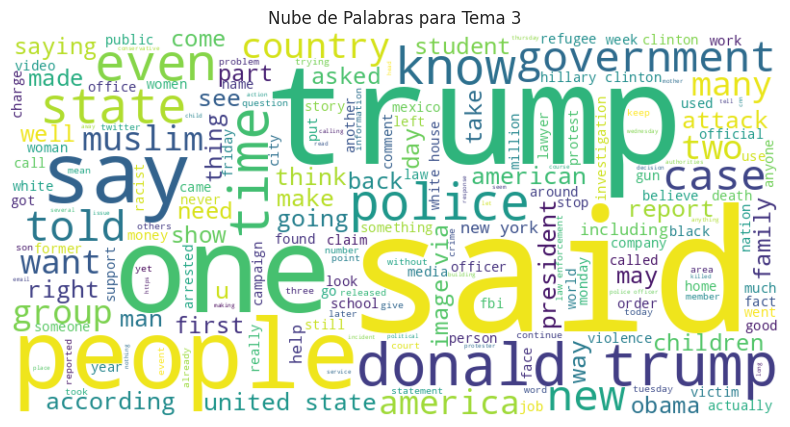

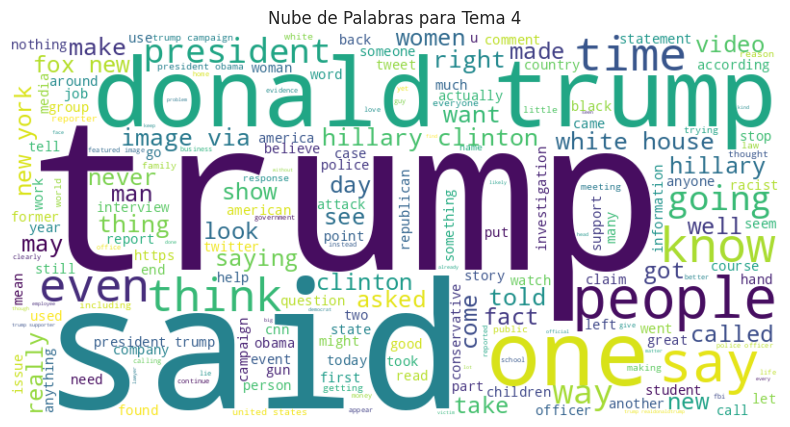

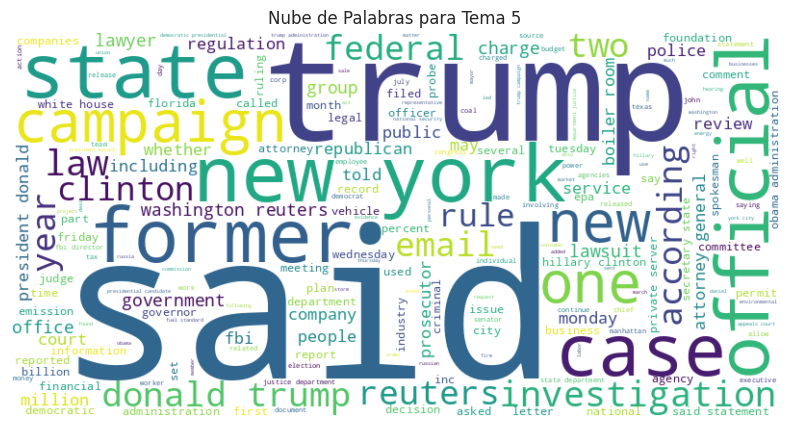

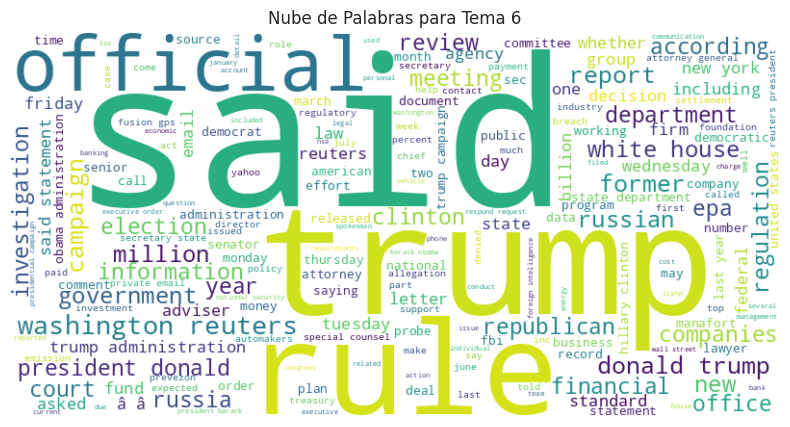

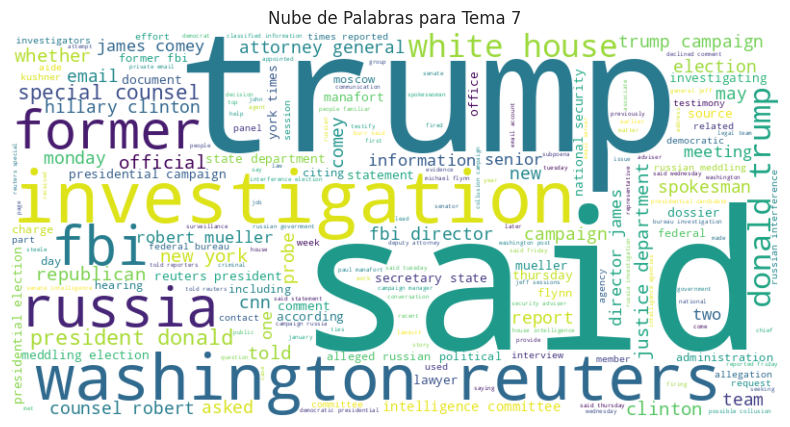

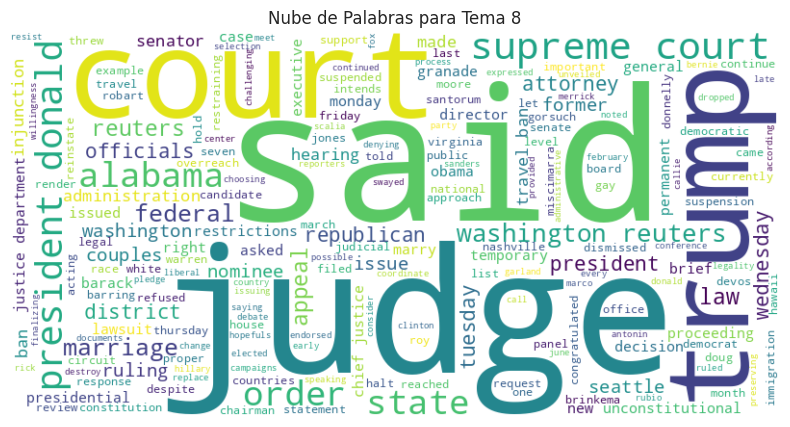

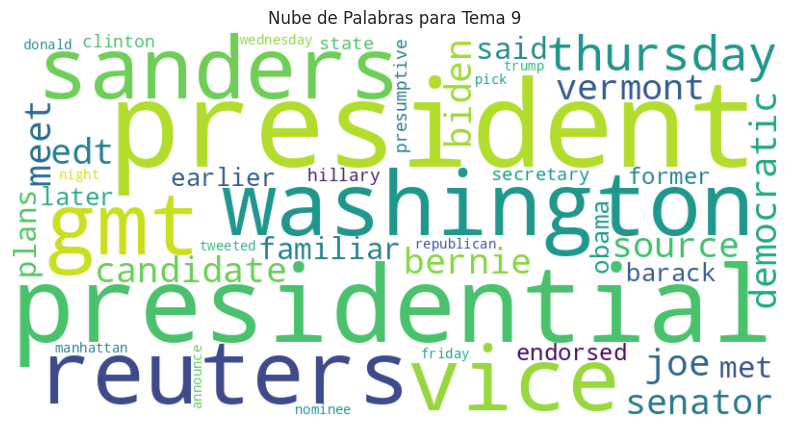

In [20]:
from wordcloud import WordCloud

# Función para generar nube de palabras por tema
def generate_wordcloud(topic_id):
    text = ' '.join(FakeXpert[FakeXpert['topic'] == topic_id]['keywords'].sum())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Nube de Palabras para Tema {topic_id}')
    plt.axis('off')
    plt.show()

# Generar nube de palabras para cada tema
for topic_id in topic_counts.index:
    generate_wordcloud(topic_id)


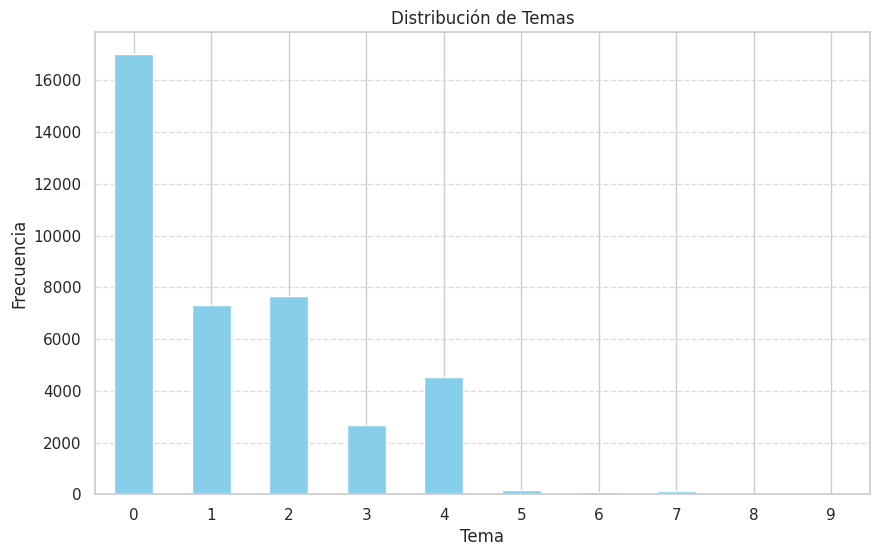

In [18]:
import matplotlib.pyplot as plt

# Calcular la frecuencia de cada tema
topic_counts = FakeXpert['topic'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Temas')
plt.xlabel('Tema')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()